In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

### data.head()

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### data.info()

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Missing Value Heatmap

In [7]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Training Data Heatmap

<AxesSubplot:>

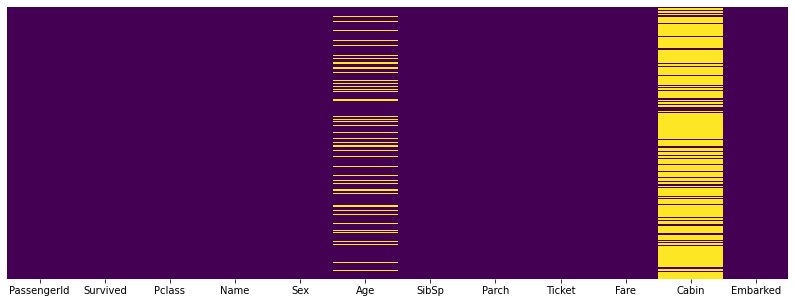

In [8]:
plt.figure(figsize=(14,5))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### Testing Data Heatmap

<AxesSubplot:>

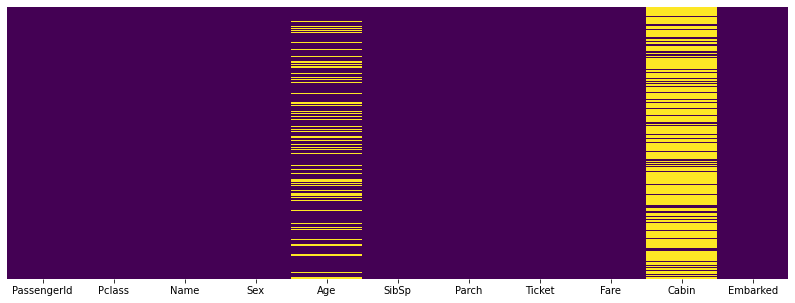

In [9]:
plt.figure(figsize=(14,5))
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* train_data.Age --> 19.87% missing data
* train_data.Cabin --> 77.10% missing data
* train_data.Embarked --> 2 missing values


* test_data.Age --> 20.57% missing data
* test_data.Cabin --> 78.23% missing data
* test_data.Fare --> 1 missing value

## How to deal with the missing values?

* Cabin column --> drop/delete
* Age & Fare --> KNN imputation
* Embarked --> Most_frequent imputation

In [10]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

### KNN Imputer

In [11]:
# drop columns for training the imputer
# train_data_impute = train_data.drop()

In [12]:
# extract only the numerical columns
# grabbing a subset of the dataframe
imputer_features = [column for column in train_data.columns if train_data[column].dtypes != "object" and column != "PassengerId" and column != "Survived"]

# drop anything with dtype="object" (ie. non-numerical) and drop "PassengerId" and "Survived Columns"

In [13]:
imputer_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
train_data[imputer_features].head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [15]:
import sklearn
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

imputer.fit(train_data[imputer_features])

# imputer.transform(test_data)

KNNImputer()

In [16]:
train_imputed = pd.DataFrame(imputer.transform(train_data[imputer_features]), columns = imputer_features)

train_data.drop(columns=imputer_features, axis=1, inplace=True)
train_data = pd.concat([train_data, train_imputed], axis=1)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Ticket       891 non-null    object 
 5   Embarked     889 non-null    object 
 6   Pclass       891 non-null    float64
 7   Age          891 non-null    float64
 8   SibSp        891 non-null    float64
 9   Parch        891 non-null    float64
 10  Fare         891 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 76.7+ KB


In [18]:
from sklearn.impute import SimpleImputer

simple_impute = SimpleImputer(strategy="most_frequent")

simple_impute.fit(train_data[["Embarked"]])

SimpleImputer(strategy='most_frequent')

In [19]:
# overwite train_imputed since we don't need the old one
train_imputed = pd.DataFrame(simple_impute.transform(train_data[["Embarked"]]), columns = ["Embarked"])

train_data.drop(columns=["Embarked"], axis=1, inplace=True)
train_data = pd.concat([train_data, train_imputed], axis=1)

In [20]:
# test_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Ticket       891 non-null    object 
 5   Pclass       891 non-null    float64
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    float64
 8   Parch        891 non-null    float64
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 76.7+ KB


#### Transform Testing Data

In [21]:
test_imputed = pd.DataFrame(imputer.transform(test_data[imputer_features]), columns = imputer_features)

test_data.drop(columns=imputer_features, axis=1, inplace=True)
test_data = pd.concat([test_data, test_imputed], axis=1)

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Sex          418 non-null    object 
 3   Ticket       418 non-null    object 
 4   Embarked     418 non-null    object 
 5   Pclass       418 non-null    float64
 6   Age          418 non-null    float64
 7   SibSp        418 non-null    float64
 8   Parch        418 non-null    float64
 9   Fare         418 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 32.8+ KB


### Check null-value counts for each column

As we can see below, all missing values have been imputed.

In [25]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Sex            0
Ticket         0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
test_data.isnull().sum()

PassengerId    0
Name           0
Sex            0
Ticket         0
Embarked       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [26]:
train_data.to_csv('titanic_train_cleaned.csv', index=False)
test_data.to_csv('titanic_test_cleaned.csv', index=False)